# Red Wine Quality Prediction Project

Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1. Loadimg the dataset to pandas dataframe
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#number of rwos and columns in the dataset
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
#cheking the missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2 Data Analysis and Visualization

Summary Statistics

The describe method will help to see how data has been spread for numerical values

we can clearly see the minimum value, mean value, different percentile values, and maximum values

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Key observations:

1. The mean is more than median (50th percentile) in all columns
2. There is a large difference in 75th percentile and max is residual sugar, free sulfur dioxide, total sulfur dioxide
3. The 1 and 2 observations suggest that there are extreme outliers present in these three columns

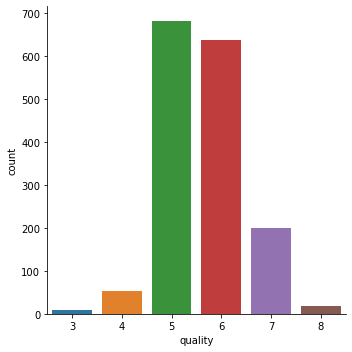

In [8]:
#number of values for each quality
sns.catplot(x='quality', data= df, kind = 'count')

Target/dependent variable is discrete and categorical in nature

quality score scale ranges from 3 to 8;
where 3 is low quality and 8 is best

Only scores obtained are between 3 to 8

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

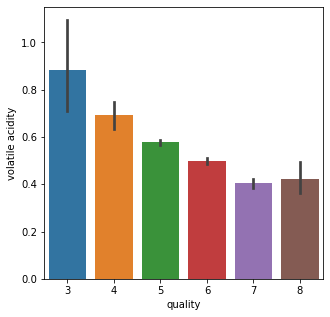

In [9]:
#which columns/random columns  are related to quality columns
# i volatile acidity vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data =df)

The volatile acidity and quality are inversly propostional to quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

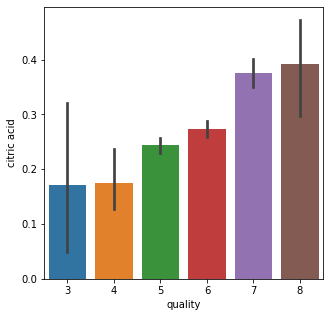

In [10]:
# ii citric acid acidity vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data =df)

The volatile acidity and quality are directly propostional to quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

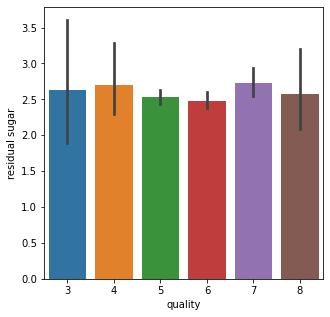

In [11]:
# iii residual sugar acid acidity
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data =df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

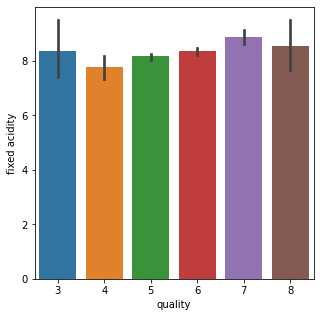

In [12]:
# iv fixed acidity acid acidity
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data =df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

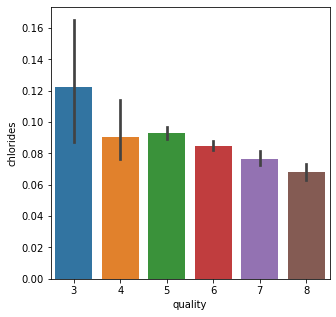

In [13]:
# v chloride acid acidity
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data =df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

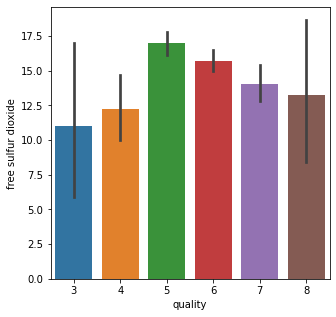

In [14]:
# vi free sulfur dioxide
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data =df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

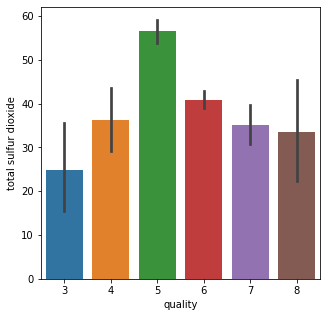

In [15]:
# vii total sulfur dioxide vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data =df)

<AxesSubplot:xlabel='quality', ylabel='density'>

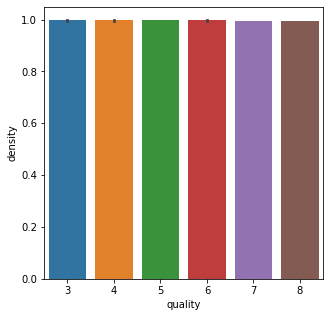

In [16]:
# vii density vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data =df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

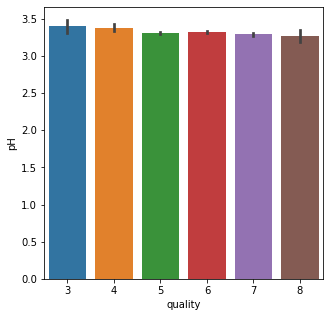

In [17]:
# vii pH vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data =df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

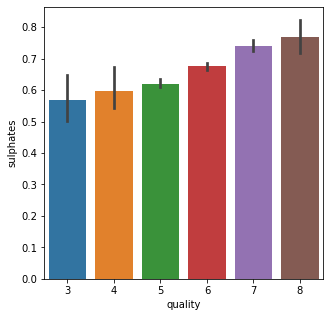

In [18]:
# vii sulphates	 vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates', data =df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

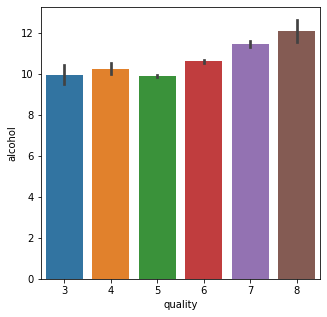

In [19]:
# vii alcohol vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data =df)

# To check correlation

1. positive corelation 2. negative corelation

In [20]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

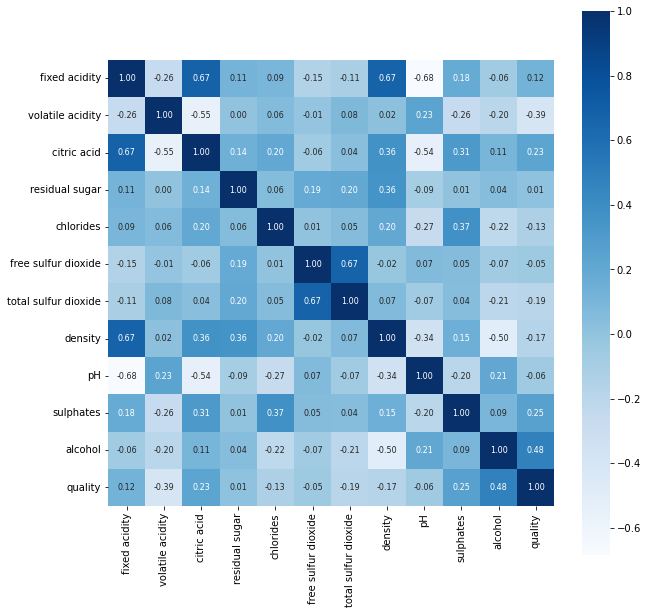

In [21]:
#Constructing a heat map to understand the correlation b/w the columns
plt.figure(figsize=(10,10))
sns.heatmap(dfcor, cbar=True, square=True, fmt='0.2f', annot=True, annot_kws={'size':8}, cmap= 'Blues')


# 3 Data preprocessing

In [22]:
#separating the dataset and quality
x=df.iloc[:,0:-1]


In [23]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

label Binarization

In [24]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

Train & test Split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)

In [27]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1119,) (480,)


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=3)

In [29]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1119,) (480,)


Model Training:

Random Forest classifier

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(x_train, y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [32]:
#accuracy on test data

x_test_prediction = model.predict(x_test)
test_data_accuarcy = accuracy_score(x_test_prediction, y_test)

In [33]:
print('Accuracy:',test_data_accuarcy)

Accuracy: 0.925


Building a prdictive system

In [34]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only oner instance 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')

[1]
Good quality wine


In [35]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

#changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only oner instance 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')

[0]
Bad quality wine


# Medical Cost Personal Insurance Project

Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [37]:
#import the data from csv file
insurance_dataset = pd.read_csv('medical_cost_insurance.csv')

In [38]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
#count the number of rows and columns
insurance_dataset.shape

(1338, 7)

In [40]:
# some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
#checking missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
#Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


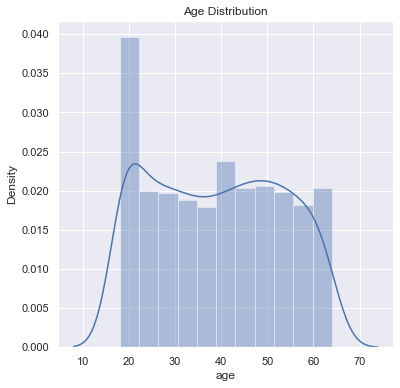

In [43]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

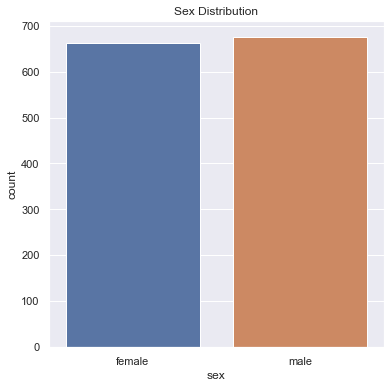

In [44]:
#Gender coulumn
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [45]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

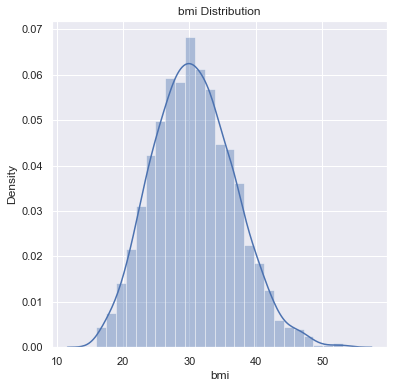

In [46]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

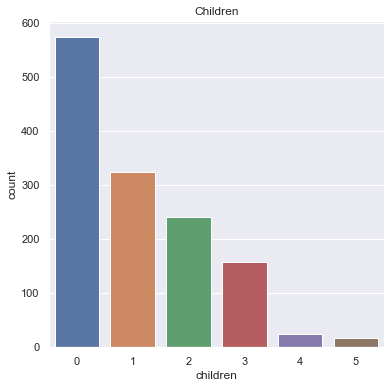

In [47]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [48]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

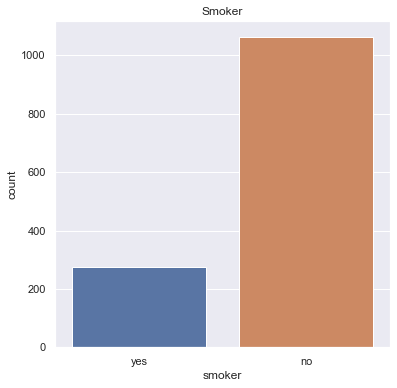

In [49]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [50]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

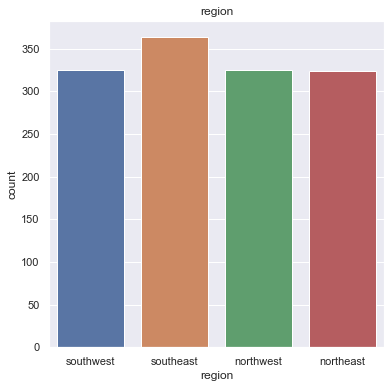

In [51]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [52]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

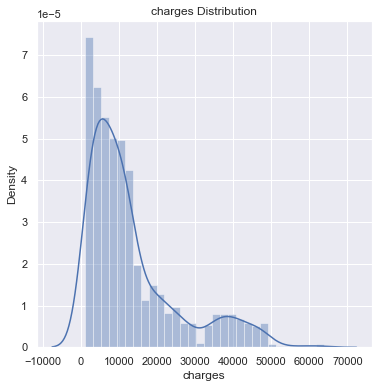

In [53]:
#Charges distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [54]:
#Encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

#Encoding Smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#Encoding Region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [55]:
#Spliting the Features and Target
X= insurance_dataset.drop(columns='charges', axis=1)
Y= insurance_dataset['charges']

In [56]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [57]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [58]:
#Spliting data into Training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [60]:
#Model testing

#Loding the Linear Regression model
regressor = LinearRegression()

In [61]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [62]:
#Model Evaluation

#Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [63]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squrared value: ',r2_train)

R squrared value:  0.751505643411174


In [64]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [65]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squrared value: ',r2_test)

R squrared value:  0.7447273869684077


In [66]:
#Building predictive system
input_data = (31,1,25,74,0,1)

#Changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

In [67]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost id USD ', prediction[0])

[70596.0307385]
The insurance cost id USD  70596.03073850487
